## Partie 1
Implémenter la méthode des treillis pour le calcul des prix d’options (pour les différents types d’options). 
On testera la méthode sur différentes instances en faisant varier les paramètres (N : le nombre de périodes, r : taux de crédit, d et u). 
On essayera de considérer aussi des instances assez larges. 

In [260]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import time

In [117]:
def assetTreeValue(n, S, u, d):  
    asset = np.zeros((n+1,n+1))
    asset[0,0] = S
    for i in range(1,n+1):
        asset[i,0] = asset[i-1,0]*u
        for j in range(1,i+1):
            asset[i,j] = asset[i-1,j-1]*d
    return asset    

In [123]:
def calculationOptionPrice(n, assetValue, K, r, u, d, PutCall, optiontype):
    value = np.zeros((n+1,n+1))
    proba = (1+r-d)/(u-d)
    
    for j in range(n+1):
        if PutCall=="C": # Call
            payoff = max(0, (assetValue[n,j]-K))
            value[n,j] = payoff
        elif PutCall=="P": #Put
            payoff = max(0, (K-assetValue[n,j]))
            value[n,j] = payoff
    
    if optiontype == "USA":
         for i in range(n-1,-1,-1):
            for j in range(i+1):
                if PutCall=="P":
                    value[i,j] = max(0, K-assetValue[i,j], (1/1+r)*(proba*value[i+1,j]+(1-proba)*value[i+1,j+1]))
                elif PutCall=="C":
                    value[i,j] = max(0, assetValue[i,j]-K, (1/1+r)*(proba*value[i+1,j]+(1-proba)*value[i+1,j+1]))
    
    if optiontype == "EUR":
         for i in range(n-1,-1,-1):
            for j in range(i+1):
                value[i,j] = (1/1+r)*(proba*value[i+1,j]+(1-proba)*value[i+1,j+1])
                    
    return value

In [124]:
asset = assetTreeValue(4, 100, 1.0425, 0.9592)
optionvalue = calculationOptionPrice(4, asset, 98, 0.00077, 1.0425, 0.9592, "P", "USA")

#print(asset, '\n')
#print(optionvalue, '\n')
#print('Option value : ', optionvalue[0][0])

#### Temps d'exécution en fonction de N (nombre de période)

In [149]:
n = 200
execution_time_Eur = []
execution_time_USD = []
series = []

for i in range(3, n):
    series.append(i)
    
    # Calcul Option USA
    tps_USD1 = time.time()
    asset_USD = assetTreeValue(i, 100, 1.1, 0.9)
    optionvalue_USD = calculationOptionPrice(i, asset_USD, 91, 0.05, 1.1, 0.9, "C", "USA")
    tps_USD2 = time.time()
    execution_time_USD.append((tps_USD2-tps_USD1)*1000)
    
    # Calcul Option EUR
    
    tps_EUR1 = time.time()
    asset_EUR = assetTreeValue(i, 100, 1.1, 0.9)
    optionvalue_EUR = calculationOptionPrice(i, asset_EUR, 91, 0.05, 1.1, 0.9, "C", "EUR")
    tps_EUR2 = time.time()
    execution_time_Eur.append((tps_EUR2-tps_EUR1)*1000)

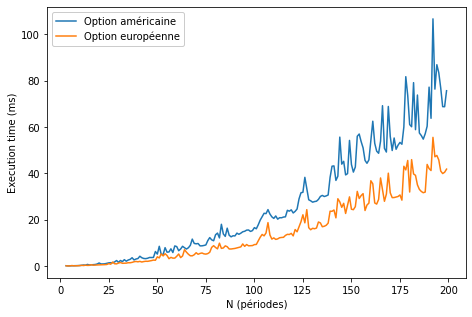

In [150]:
plt.figure(figsize=(7.5,5)) #Changer taille de la figure
plt.plot(series, execution_time_USD, label='Option américaine') # Plot l'USD 
plt.plot(series, execution_time_Eur, label='Option européenne')  # Plot l'EUR
plt.xlabel("N (périodes)")
plt.ylabel("Execution time (ms)")
plt.legend(framealpha=1, frameon=True);
plt.show()

#### Prix option Put en fonction des périodes N (nombre de période)

In [212]:
n = 100
price_Put_Eur = []
price_Put_USD = []
series = []

for i in range(3, n):
    series.append(i)
    asset = assetTreeValue(i, 100, 1.1, 0.9)
        
    # Put
    optionvalue_Put_USD = calculationOptionPrice(i, asset, 98, 0.05, 1.1, 0.9, "P", "USA")
    price_Put_USD.append(optionvalue_Put_USD[0][0])

    # Put
    optionvalue_Put_Eur = calculationOptionPrice(i, asset, 98, 0.05, 1.1, 0.9, "P", "EUR")
    price_Put_Eur.append(optionvalue_Put_Eur[0][0])
    

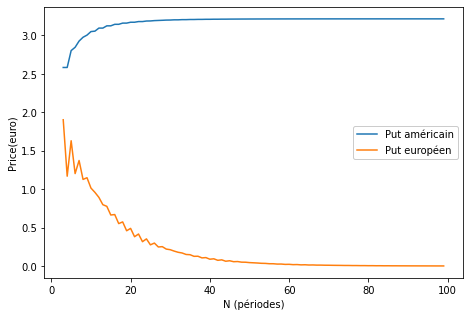

In [213]:
plt.figure(figsize=(7.5,5))  #Changer taille de la figure

plt.plot(series, price_Put_USD, label='Put américain')  # Plot l'EUR

plt.plot(series, price_Put_Eur, label='Put européen')  # Plot l'USD 

plt.xlabel("N (périodes)")
plt.ylabel("Price(euro)")
plt.legend(framealpha=1, frameon=True);
plt.show()

#### Prix option Call en fonction des périodes N (nombre de période)

In [214]:
n = 100
price_Call_USD = []
price_Call_Eur = []
series = []

for i in range(3, n):
    series.append(i)
    asset = assetTreeValue(i, 100, 1.1, 0.9)
    
    # Call
    optionvalue_Call_USD = calculationOptionPrice(i, asset, 110, 0.05, 1.1, 0.9, "C", "USA")
    price_Call_USD.append(optionvalue_Call_USD[0][0])
    #print(optionvalue_Call_USD)
    
     # Call
    optionvalue_Call_Eur = calculationOptionPrice(i, asset, 110, 0.05, 1.1, 0.9, "C", "EUR")
    price_Call_Eur.append(optionvalue_Call_Eur[0][0])
    #print(optionvalue_Call_Eur)

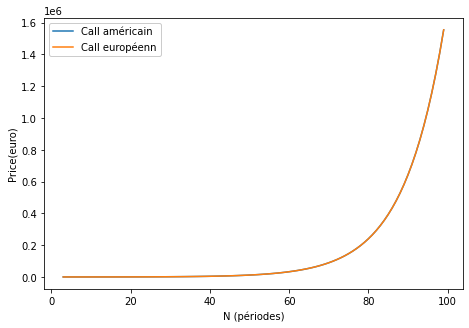

In [215]:
plt.figure(figsize=(7.5,5))  #Changer taille de la figure

plt.plot(series, price_Call_USD, label='Call américain')
plt.plot(series, price_Call_Eur, label='Call européenn')  # Plot l'USD 

plt.xlabel("N (périodes)")
plt.ylabel("Price(euro)")
plt.legend(framealpha=1, frameon=True);
plt.show()

#### Prix option en fonction du r (taux sans risque) pour 10 périodes, on peut faire un graphe 3D ou un tableau :

In [216]:
price_Put_Eur = []
price_Put_USD = []

price_Call_USD = []
price_Call_Eur = []
series = []

def decimal_range(start, stop, increment):
    while start < stop: # and not math.isclose(start, stop): Py>3.5
        yield start
        start += increment

for i in decimal_range(0.0, 3.0, 0.01):
    series.append(i)
    asset = assetTreeValue(10, 100, 1.1, 0.9)
        
    # Put USA
    optionvalue_Put_USD = calculationOptionPrice(10, asset, 98, i, 1.1, 0.9, "P", "USA")
    price_Put_USD.append(optionvalue_Put_USD[0][0])

    # Put EUR
    optionvalue_Put_Eur = calculationOptionPrice(10, asset, 98, i, 1.1, 0.9, "P", "EUR")
    price_Put_Eur.append(optionvalue_Put_Eur[0][0])
    
    # Call USA
    optionvalue_Call_USD = calculationOptionPrice(10, asset, 110, i, 1.1, 0.9, "C", "USA")
    price_Call_USD.append(optionvalue_Call_USD[0][0])
    
    # Call EUR
    optionvalue_Call_Eur = calculationOptionPrice(10, asset, 110, i, 1.1, 0.9, "C", "EUR")
    price_Call_Eur.append(optionvalue_Call_Eur[0][0])
    

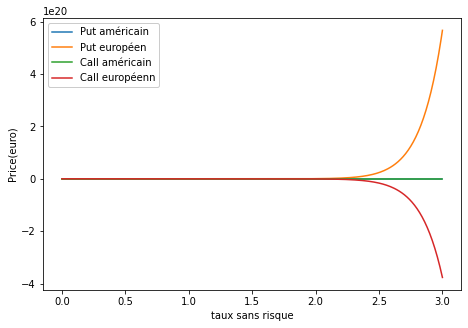

In [217]:
plt.figure(figsize=(7.5,5))  #Changer taille de la figure

plt.plot(series, price_Put_USD, label='Put américain')  # Plot l'EUR

plt.plot(series, price_Put_Eur, label='Put européen')  # Plot l'USD 

plt.plot(series, price_Call_USD, label='Call américain')

plt.plot(series, price_Call_Eur, label='Call européenn')

plt.xlabel("taux sans risque")
plt.ylabel("Price(euro)")
plt.legend(framealpha=1, frameon=True);
plt.show()

#### Prix option de 5 périodes, 100 euros au départ, en fonction de K (strike) :

In [255]:
price_Put_Eur = []
price_Put_USD = []

price_Call_USD = []
price_Call_Eur = []
series = []


for i in range(0,200):
    series.append(i)
    asset = assetTreeValue(10, 100, 1.1, 0.9)
        
    # Put USA
    optionvalue_Put_USD = calculationOptionPrice(5, asset, i, 0.05, 1.1, 0.9, "P", "USA")
    price_Put_USD.append(optionvalue_Put_USD[0][0])

    # Put EUR
    optionvalue_Put_Eur = calculationOptionPrice(5, asset, i, 0.05, 1.1, 0.9, "P", "EUR")
    price_Put_Eur.append(optionvalue_Put_Eur[0][0])
    
    # Call USA
    optionvalue_Call_USD = calculationOptionPrice(5, asset, i, 0.05, 1.1, 0.9, "C", "USA")
    price_Call_USD.append(optionvalue_Call_USD[0][0])
    
    # Call EUR
    optionvalue_Call_Eur = calculationOptionPrice(5, asset, i, 0.05, 1.1, 0.9, "C", "EUR")
    price_Call_Eur.append(optionvalue_Call_Eur[0][0])

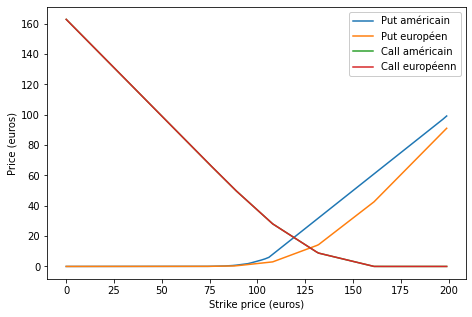

In [219]:
plt.figure(figsize=(7.5,5))  #Changer taille de la figure

plt.plot(series, price_Put_USD, label='Put américain')  # Plot l'EUR

plt.plot(series, price_Put_Eur, label='Put européen')  # Plot l'USD 

plt.plot(series, price_Call_USD, label='Call américain')

plt.plot(series, price_Call_Eur, label='Call européenn')

plt.xlabel("Strike price (euros)")
plt.ylabel("Price (euros)")
plt.legend(framealpha=1, frameon=True);
plt.show()

#### Prix option 100 euros au départ, en fonction de K (strike) et nombre de période :

In [257]:
n = 50
price_Put_Eur = []
price_Put_USD = []

price_Call_USD = []
price_Call_Eur = []

series = []
strike = []


for i in range(3, n):
    asset = assetTreeValue(i, 100, 1.1, 0.9)
    for j in range(75,125):
        series.append(i)
        strike.append(j)
        # Put USA
        optionvalue_Put_USD = calculationOptionPrice(i, asset, j, 0.05, 1.1, 0.9, "P", "USA")
        price_Put_USD.append(optionvalue_Put_USD[0][0])

        # Put EUR
        optionvalue_Put_Eur = calculationOptionPrice(i, asset, j, 0.05, 1.1, 0.9, "P", "EUR")
        price_Put_Eur.append(optionvalue_Put_Eur[0][0])

        # Call USA
        optionvalue_Call_USD = calculationOptionPrice(i, asset, j, 0.05, 1.1, 0.9, "C", "USA")
        price_Call_USD.append(optionvalue_Call_USD[0][0])

        # Call EUR
        optionvalue_Call_Eur = calculationOptionPrice(i, asset, j, 0.05, 1.1, 0.9, "C", "EUR")
        price_Call_Eur.append(optionvalue_Call_Eur[0][0])

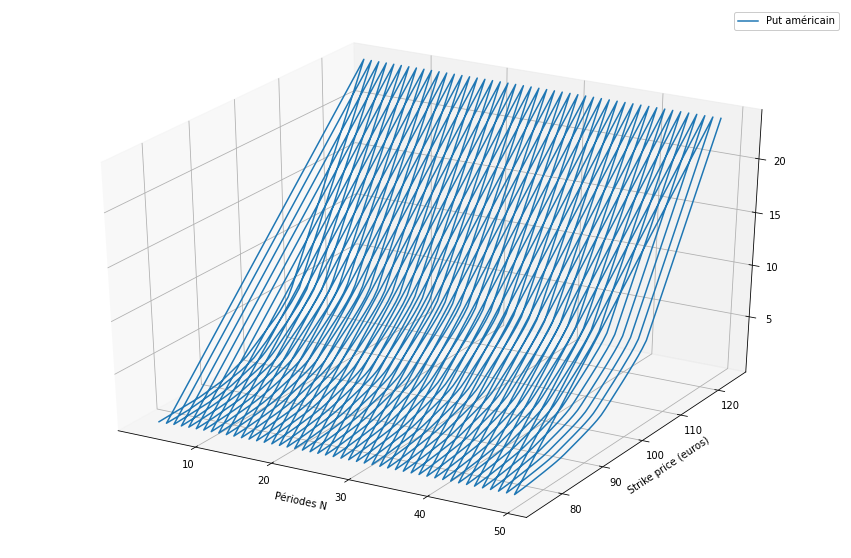

In [267]:
plt.figure(figsize=(15,10)) 
ax = plt.axes(projection='3d')


ax.plot3D(series, strike, price_Put_USD, label='Put américain')


#ax.plot3D(series, strike, price_Call_USD, label='Call américain')


#ax.plot3D(series, strike, price_Put_Eur, label='Put européen')
#ax.plot3D(series, strike, price_Call_Eur, label='Call européen')

plt.xlabel("Périodes N")
plt.ylabel("Strike price (euros)")
#plt.set_zlabel("Price Option(euros)")

plt.legend(framealpha=1, frameon=True);

plt.show()

## Partie 2
Ecrire le modèle qui permet de minimiser la CVaR pour une probabilité donnée  (On donne le modèle général avec un nombre d’actifs n, un nombre de scénarios S, un vecteur rendement  et un rendement minimum R. 

<img src="pics\Partie 2.png" width="480" />

In [127]:
from scipy.optimize import minimize

In [134]:
# X[0] Gamma, X[1...N] Actifs risqués 
def func_minimise_ES(X):
    loose_function = 0
    for i in range(S):
        for j in range (1, X.size):   
            loose_function = loose_function + max(((b[j]-Y[i][j-1])*X[j]-X[0]),0)
    return X[0] + (1/(1-alpha)*S)*loose_function

In [140]:
# S fois cette contrainte
def constraint1(X,s):
    sum = 0
    for j in range (1,X.size):
        sum = sum + (b[j]-Y[s][j-1])*X[j]
    return max((sum-X[0]),0) - (sum-X[0])



In [141]:
# S fois cette contrainte
def constraint2(X,s):
    sum = 0
    for j in range (1,X.size):
        sum = sum + (b[j]-Y[s][j-1])*X[j]
    
    return max((sum-X[0]),0)-0

In [142]:
def constraint3(X):
    sum = 1
    for i in range(1,X.size):
        sum = sum - X[i]
    
    return sum


In [143]:
def minimise_ES_constraint4(X):
    sum = 0
    for i in range(1,X.size):
        sum += X[i]*E[i]
        
    return sum - R

In [144]:
# Pour que la somme des X soit toujours un reel 
def constraint5(X):
    return np.sum(np.iscomplex(X))

#### Fonctions pour la compréhension logique : 

In [158]:
def calculatePortfolioRendement(X):
    sum = 0
    for i in range(1,X.size):
        sum += X[i]*E[i]
    return sum

In [159]:
def loose_function(X):
    loose_function = 0
    for i in range(S):
        for j in range (1, X.size):
            loose_function = loose_function + max(((b[j]-Y[i][j-1])*X[j]-X[0]),0)
    return loose_function

#### Générateur de scénarios :

In [160]:
import random as rd
import matplotlib.pyplot as plt

In [180]:
def generateY(X,S):
    Y = []
    for i in range(S):
        Z = []
        for j in range(1,X.size):
            Z.append(X[j] + rd.randint(0, 10)) 
        Y.append(Z)
    return Y

#### Calculer VaR initial (Test) :

Méthode de Calcul de la Variance : https://blog.quantinsti.com/calculating-covariance-matrix-portfolio-variance/ <br>
Expected portfolio variance = WT * (Covariance Matrix) * W
<br>
La matrice de covariance est donnée, par besoin de valeurs historiques

In [162]:
def calculatePortfolioVariance(X):
    assets = X
    assets = np.delete(assets, 0)
    variance = (assets)*Cov*(assets.reshape((-1, 1)))
    return variance 

La volatilité du portefeuille est la racine carré de la variance :

In [163]:
def calculatePortfolioVolatity(X):
    variance = calculatePortfolioVariance(X)
    variance = variance[0][0]
    return mt.pow(variance, (0.5))

Méthode de calcul de la VaR paramétrique : https://meritis.fr/vous-saurez-tout-sur-la-var/ <br>
VaR = z*sigma - R <br>
    - R : rentabilité du portefeuille
    - z : interval de confiance de la loi normal obtenue grâce à norm
    - sigma : volatility du portefeuille

In [164]:
def calculatePortfolioVaR(X, alpha):
    rend = calculatePortfolioRendement(X)
    z = norm.ppf(1-alpha)
    sigma = calculatePortfolioVolatity(X)
    VaR_n = abs(z*sigma - rend)
    return  round(VaR_n*100,2)

#### Calculer CVaR initial (Test) :

### Exécution

In [165]:
import math as mt
from scipy.stats import norm
import time

#### General Informations : 

In [166]:
alpha = 0.99 # Probabilité
R = 0.10 # Rentabilité

#### Assets Informations :

In [170]:
Nb_Assets = 3
Valo = 10000 # fixe Valorisation fictive pour calculer la VaR fictive 

X = np.array([1, 0.5, 0.25, 0.25]) # Réparitition des actifs,  Attention : X[0] == gamma
b = np.array([0, 10, 10, 10]) # Prix des obligations, b[0]=0 pour la fonction objective
E = np.array([0, 0.1073, 0.07415, 0.0627]) # Espérence de rendement des actifs

Cov = np.matrix([[0.02778, 0.00387, 0.00021], [0.00387, 0.01112, -0.00020], [0.00021, -0.00020, 0.00115] ])


print('Réparition des actifs (X[0] => Gamma) X: ', X, '\n')
print('Prix des obligations b : ', b, '\n')
print('Espérance de rendement E : ', E, '\n')
print('Covarinace des actifs Cov :', Cov, '\n')

Réparition des actifs (X[0] => Gamma) X:  [1.   0.5  0.25 0.25] 

Prix des obligations b :  [ 0 10 10 10] 

Espérance de rendement E :  [0.      0.1073  0.07415 0.0627 ] 

Covarinace des actifs Cov : [[ 0.02778  0.00387  0.00021]
 [ 0.00387  0.01112 -0.0002 ]
 [ 0.00021 -0.0002   0.00115]] 



#### Scénarios Informations :

In [164]:
S = 100 # Nombre de scénarios
Y = np.array(generateY(X,S)) # vecteur de probabilités
#print('Vecteur de probabilité Y : ', Y)

NameError: name 'generateY' is not defined

#### Lancement :

In [187]:
tps1 = time.time()

print('Function initale : ', func_minimise_ES(X))
#print('VaR initial VaR : ', calculatePortfolioVaR(X, alpha))
print('Function de perte initial : ', loose_function(X))
print('Gamma initial : ', X[0])
print('1 - Répartition initiale : ', constraint3(X))
print('Rendement initial : ', calculatePortfolioRendement(X))
print('Rendement initial - Rendement espéré : ', minimise_ES_constraint4(X), '\n')



# constraints
Const1 = [] # S*contrainte 
Const2 = [] # S*contrainte
for i in range(S):
    Const1.append({'type':'ineq','args' : (i,) , 'fun': constraint1})
    Const2.append({'type':'ineq','args' : (i,)  , 'fun': constraint2}) 

ineq_cons = []
ineq_cons = (Const1 + Const2 + [{'type':'eq','fun': constraint3}, {'type':'ineq','fun': minimise_ES_constraint4}])


# bonds xxx
bond = (0, 1.0)
ineq_bond = ((None, None),)
for i in range(Nb_Assets):
    ineq_bond = ineq_bond + (bond,) # x1 >= 0, x2 >= 0, ...


sol = minimize(func_minimise_ES,
               x0=X, 
               method='trust-constr',  # quand S petit, utiliser 'SLSQP' 
               bounds=ineq_bond, 
               options={'disp': True},
               constraints=ineq_cons)
print(sol, '\n')
Res = sol.x

print('Function finale : ', func_minimise_ES(Res))
#print('VaR final VaR : ', calculatePortfolioVaR(Res, alpha))
print('Function de perte finale : ', loose_function(Res))
print('Gamma final : ', Res[0])
print('1 - Répartition obtenue : ', constraint3(Res))
print('Rendement final : ', calculatePortfolioRendement(Res))
print('Rendement final - Rendement espéré :  ', minimise_ES_constraint4(Res), '\n')

tps2 = time.time()
print('temps d\'exécution', tps2 - tps1, 'secondes')

Function initale :  2253750.999999998
Function de perte initial :  225.375
Gamma initial :  1.0
1 - Répartition initiale :  0.0
Rendement initial :  0.08786250000000001
Rendement initial - Rendement espéré :  -0.012137499999999996 

`xtol` termination condition is satisfied.
Number of iterations: 366, function evaluations: 1615, CG iterations: 571, optimality: 1.15e-08, constraint violation: 1.06e-08, execution time: 3.9e+01 s.
 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 571
      cg_stop_cond: 1
            constr: [array([0.]), array([0.6572357]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([

## Partie 3

Considérons le modèle de Markowitz maximisant le rendement du portefeuille et assurant une CVaR  ne dépassant pas un certain seuil.  
Ecrire le modèle correspondant et le résoudre pour certaines données aléatoires. 

<img src="pics\Partie 3.png" width="494" />

In [25]:
from scipy.optimize import linprog

In [27]:
# Définition des nouvelles varibales 

J = np.array([0, 0.50, 0.25, 0.25]) # Ensemble d'indices sur les différentes valeurs disponibles
U = np.array([0, 1, 3, 4 ]) # Risque maximal toléré pour une valeur Alpha j

In [28]:
# X[0] Gamma, X[1...N] Actifs risqués 
def func_maximise_yield(X):
    rendement = 0
    for i in range(1,X.size):
        rendement += X[i]*E[i]
    return rendement

In [29]:
# S fois cette contrainte
def maximise_yield_constraint1(X,alpha_j):
    sum = 0
    for i in range(S):
        loose_function = 0
        for j in range (1, X.size):
            loose_function = loose_function + max(((b[j]-Y[i])*X[j]-X[0]),0)
            
    return U[alpha_j] - (X[0] + (1/(1-alpha)*S)*loose_function) 

In [47]:
# constraints
Max_Const1 = [] # S*contrainte 
Max_Const2 = [] # S*contrainte 
Max_Const3 = [] # S*contrainte

for i in range(1, J.size):
    Max_Const1.append({'type':'ineq','args' : (i,) , 'fun': maximise_yield_constraint1})
        
for i in range(S):
    Max_Const2.append({'type':'ineq','args' : (i,)  , 'fun': constraint2})
    Max_Const3.append({'type':'ineq','args' : (i,)  , 'fun': constraint2})

Max_ineq_cons = []
Max_ineq_cons = (Max_Const1 + Max_Const2 + Max_Const3 +[{'type':'eq','fun': constraint3}])
             


# bonds 
bond = (0, 1.0)
Max_ineq_bond = ((None, None),)
for i in range(Nb_Assets):
    Max_ineq_bond = Max_ineq_bond + (bond,) # x1 >= 0, x2 >= 0, ...


sol = minimize(func_maximise_yield,
               x0=X, 
               method='SLSQP',  # Il faut trouver la bonne méthode
               bounds=Max_ineq_bond, 
               options={'disp': True},
               constraints=Max_ineq_cons)
print(sol, '\n')

Iteration limit reached    (Exit mode 9)
            Current function value: 0.0042663511016504865
            Iterations: 100
            Function evaluations: 1280
            Gradient evaluations: 99
     fun: 0.0042663511016504865
     jac: array([0.     , 0.1073 , 0.00415, 0.0627 , 0.1045 , 0.1235 ])
 message: 'Iteration limit reached'
    nfev: 1280
     nit: 100
    njev: 99
  status: 9
 success: False
       x: array([9.98525120e+00, 2.50350475e-06, 9.98014869e-01, 1.98275174e-03,
       1.66979327e-08, 3.96356454e-09]) 

